# Predator detection and escape from _Polynices_ sp by _Isanda coronta_

Data obtained from all tracks where start of prey movement clearly recorded with respect to predators position. Re-encounters between the same prey item and predator are not included.



| KEY   | Description |
|-------|:------------|
| DATE | date of track |
| TS | time of track started |
| TF | time track finished |
| PPL | predator prey location |
| TP | track position |
| D1 | distance from predator prey commenced moving (mm) |
| A1 | angle from direction of movement of predator |
| B1 | beeline distance from predator position to end of prey track |
| B2 | beeline direction from predator position to end of prey track |
| T1 | total distance moved by prey |
| T2 | total time taken to move T1 |
| DS | depth of search by predator |
| PD | possible detection of prey by predator |
| PS | prey speed overall T1/T2 |

In [64]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

DATA = '../data/Isanda_coronata-escape-response/ic-escape-response.csv'
df = pd.read_csv(DATA)

df.head(15)

,DATE,TS,TF,PPL,TP,D1,A1,B1,B2,T1,T2,DS,PD,PS
0,201084,1010,1100,111,122.0,11.0,353.0,NaN,NaN,NaN,NaN,NaN,0,NaN
1,221084,1145,1155,111,11.0,5.0,68.0,NaN,NaN,NaN,NaN,NaN,1,NaN
2,241084,1253,1309,111,17.0,12.0,312.0,NaN,NaN,NaN,NaN,NaN,1,NaN
3,61184,1353,1401,112,13.0,21.0,11.0,42.0,349.0,24.0,NaN,NaN,1,NaN
4,61184,1304,1332,112,93.0,33.0,30.0,NaN,NaN,NaN,NaN,4.0,0,NaN
5,61184,1304,1332,112,95.0,23.0,354.0,NaN,NaN,NaN,NaN,4.0,0,NaN
6,61184,1304,1332,112,97.0,18.0,4.0,NaN,NaN,NaN,NaN,4.0,0,NaN
7,61184,1114,1126,112,30.0,11.0,113.0,NaN,NaN,NaN,NaN,NaN,1,NaN
8,91184,1532,1546,112,51.0,28.0,22.0,NaN,NaN,NaN,NaN,5.0,0,NaN
9,91184,1532,1546,112,26.0,11.0,309.0,NaN,NaN,NaN,NaN,NaN,1,NaN


# Reactive Distance

The average distance at which _Isanda coronata_ appears to detect the approach of _Polynices sordidus_ from recorded tracks is 19.38mm with a std deviation of 10.82mm.  


In [65]:
df['D1'].describe()

count    62.000000
mean     19.387097
std      10.828552
min       3.000000
25%      13.000000
50%      17.500000
75%      22.750000
max      60.000000
Name: D1, dtype: float64

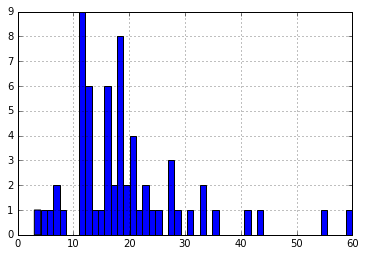

In [66]:
df['D1'].hist(bins = 50)

# Angle from Direction of Movement of Predator

The bimodel distribution shows that _I. coronata_ is detecting the approach of _P. sordidus_ mainly in a 60 degree arc either side of the predators direction of movement.

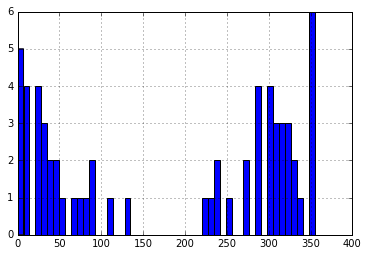

In [67]:
df['A1'].hist(bins=50)

# Beeline distance from predator position to end of prey track

In [69]:
df['B1'].describe()

count     34.000000
mean      71.676471
std       43.277624
min       15.000000
25%       42.250000
50%       62.500000
75%       91.000000
max      198.000000
Name: B1, dtype: float64

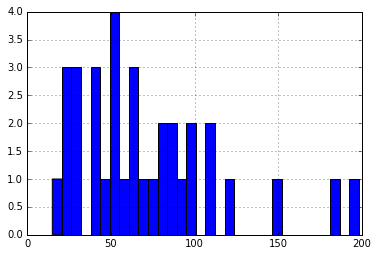

In [77]:
df['B1'].hist(bins=32)

# Beeline direction from predator position to end of prey track

In [73]:
df['B2'].describe()

count     32.000000
mean     199.187500
std      131.178882
min        3.000000
25%       48.250000
50%      231.500000
75%      320.750000
max      354.000000
Name: B2, dtype: float64

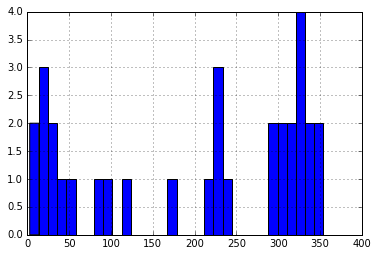

In [76]:
df['B2'].hist(bins=32)

# Total distance moved by prey

In [78]:
df['T1'].describe()

count     46.000000
mean     114.173913
std      100.226921
min       15.000000
25%       41.000000
50%       81.000000
75%      160.250000
max      480.000000
Name: T1, dtype: float64

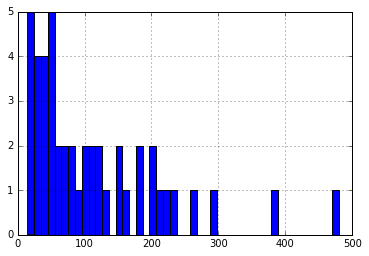

In [79]:
df['T1'].hist(bins=46)

# Total time taken to move T1

In [80]:
df['T2'].describe()

count     35.000000
mean      67.285714
std       53.016963
min       15.000000
25%       30.000000
50%       60.000000
75%       75.000000
max      225.000000
Name: T2, dtype: float64

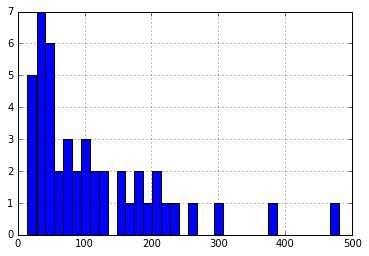

In [81]:
df['T1'].hist(bins=35)

# Possible detection of prey by predator

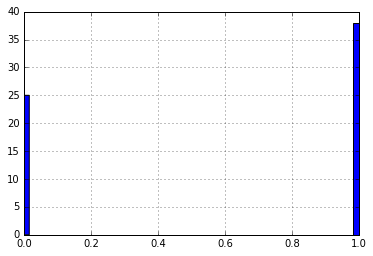

In [83]:
df['PD'].hist(bins=63)